In [1]:
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
output_path = './MH_F_Results_Anvil'

In [4]:
lm = gpd.read_file(os.path.join(output_path, 'MH_F_lm_all.geojson'))
mi = gpd.read_file(os.path.join(output_path, 'MH_F_mi_all.geojson'))
'''
lm = gpd.GeoDataFrame()

for i in range(0, 19):
    print(i)
    if i != 17:
        temp_path = os.path.join(output_path, f'N_{i}', f'MH_F_lm.geojson')
        if os.path.exists(temp_path):
            temp_ = gpd.read_file(temp_path)
            temp_['iter'] = i
            lm = pd.concat([lm, temp_], ignore_index=True)
    else:    
        for ii in range(0, 6):
            temp_path = os.path.join(output_path, f'N_17', f'N_{ii}', f'MH_F_lm.geojson')
            if os.path.exists(temp_path):
                temp_ = gpd.read_file(temp_path)
                temp_['iter'] = i
                lm = pd.concat([lm, temp_], ignore_index=True)
                
lm.to_file(os.path.join(output_path, 'MH_F_lm_all.geojson'))         
'''
lm

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,...,LISA_MOBILE,dist_MOBILE,LISA_CROWD,dist_CROWD,LISA_NOVEH,dist_NOVEH,LISA_GROUPQ,dist_GROUPQ,geometry,iter
0,34.031727,3.5,23.757263,7.0,10.8,25.0,22.192750,17.9,7.746934,0.249688,...,HL,1000,HH,2500,HL,1000,HL,1000,"POLYGON ((-103.15063 38.06460, -103.15005 38.0...",0
1,34.031727,3.5,23.757263,7.0,10.8,25.0,22.192750,17.9,7.746934,0.249688,...,HL,1000,HH,2500,HL,1000,HL,1000,"POLYGON ((-103.13127 38.06279, -103.13121 38.0...",0
2,34.031727,3.5,23.757263,7.0,10.8,25.0,22.192750,17.9,7.746934,0.249688,...,LL,1000,LH,2500,LL,1000,LL,1000,"POLYGON ((-103.15297 38.06266, -103.15292 38.0...",0
3,34.031727,3.5,23.757263,7.0,10.8,25.0,22.192750,17.9,7.746934,0.249688,...,HL,1000,HH,2500,HL,1000,HL,1000,"POLYGON ((-103.16115 38.07808, -103.16117 38.0...",0
4,34.031727,3.5,23.757263,7.0,10.8,25.0,22.192750,17.9,7.746934,0.249688,...,HL,1000,HH,2500,HL,1000,HL,1000,"POLYGON ((-103.14265 38.08519, -103.14164 38.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508092,30.333592,10.1,26.354863,27.4,3.9,18.9,30.747349,16.4,7.572383,12.050209,...,Not_Sig,7500,LL,2500,LL,500,Not_Sig,2500,"POLYGON ((-120.99476 37.43819, -120.99470 37.4...",18
1508093,30.333592,10.1,26.354863,27.4,3.9,18.9,30.747349,16.4,7.572383,12.050209,...,Not_Sig,7500,LL,2500,LL,500,Not_Sig,2500,"POLYGON ((-120.99449 37.44937, -120.98998 37.4...",18
1508094,30.333592,10.1,26.354863,27.4,3.9,18.9,30.747349,16.4,7.572383,12.050209,...,Not_Sig,7500,Not_Sig,2500,HL,500,Not_Sig,2500,"POLYGON ((-121.01468 37.42700, -121.01460 37.4...",18
1508095,30.333592,10.1,26.354863,27.4,3.9,18.9,30.747349,16.4,7.572383,12.050209,...,Not_Sig,7500,Not_Sig,2500,HL,500,Not_Sig,2500,"POLYGON ((-121.01483 37.42712, -121.01474 37.4...",18


In [18]:
dam_id = 'CA10020'
iter_num = mi.loc[mi['ID'] == dam_id, 'iter'].values[0]

In [10]:
mi.loc[mi['ID'] == dam_id, [col for col in mi.columns if col.startswith('dist')]].T

,0
dist_POV150,1000
dist_UNEMP,1000
dist_HBURD,1000
dist_NOHSDP,1000
dist_UNINSUR,1000
dist_AGE65,1000
dist_AGE17,1000
dist_DISABL,1000
dist_SNGPNT,1000
dist_LIMENG,1000


In [12]:
iter_num

9

In [19]:
fim = gpd.read_file(os.path.join(output_path, f'N_{iter_num}', 'MH_F_fim.geojson'))
fim = fim.loc[fim['Dam_ID'] == f'{dam_id}']
fim.explore('value', cmap='Blues')

In [8]:
# str: single variable
# list: [[To be summed and set as numerator], demonimator]  
census_info = {
                "EP_POV150" : [['S1701_C01_040E'], 'S1701_C01_001E'],
                "EP_UNEMP"  : 'DP03_0009PE',
                "EP_HBURD"  : [['S2503_C01_028E', 'S2503_C01_032E', 'S2503_C01_036E', 'S2503_C01_040E'], 
                            'S2503_C01_001E'],
                "EP_NOHSDP" : 'S0601_C01_033E',
                "EP_UNINSUR" : 'S2701_C05_001E',
                "EP_AGE65" : 'S0101_C02_030E',
                "EP_AGE17" : [['B09001_001E'], 
                            'S0601_C01_001E'],
                "EP_DISABL" : 'DP02_0072PE',
                "EP_SNGPNT" : [['B11012_010E', 'B11012_015E'], 'DP02_0001E'],
                "EP_LIMENG" : [['B16005_007E', 'B16005_008E', 'B16005_012E', 'B16005_013E', 'B16005_017E', 'B16005_018E', 
                                'B16005_022E', 'B16005_023E', 'B16005_029E', 'B16005_030E', 'B16005_034E', 'B16005_035E',
                                'B16005_039E', 'B16005_040E', 'B16005_044E', 'B16005_045E'], 
                            'B16005_001E'],
                "EP_MINRTY" : [['DP05_0071E', 'DP05_0078E', 'DP05_0079E', 'DP05_0080E', 
                                'DP05_0081E', 'DP05_0082E', 'DP05_0083E'],
                            'S0601_C01_001E'],
                "EP_MUNIT" : [['DP04_0012E', 'DP04_0013E'], 
                            'DP04_0001E'],
                "EP_MOBILE" : 'DP04_0014PE',
                "EP_CROWD" : [['DP04_0078E', 'DP04_0079E'], 
                            'DP04_0002E'],
                "EP_NOVEH" : 'DP04_0058PE',
                "EP_GROUPQ": [['B26001_001E'], 
                            'S0601_C01_001E'],
}
plot_cols_lm = ['LISA_' + col.split('_')[1] for col in census_info.keys()]
plot_cols_mi = ['MI_' + col.split('_')[1] for col in census_info.keys()]


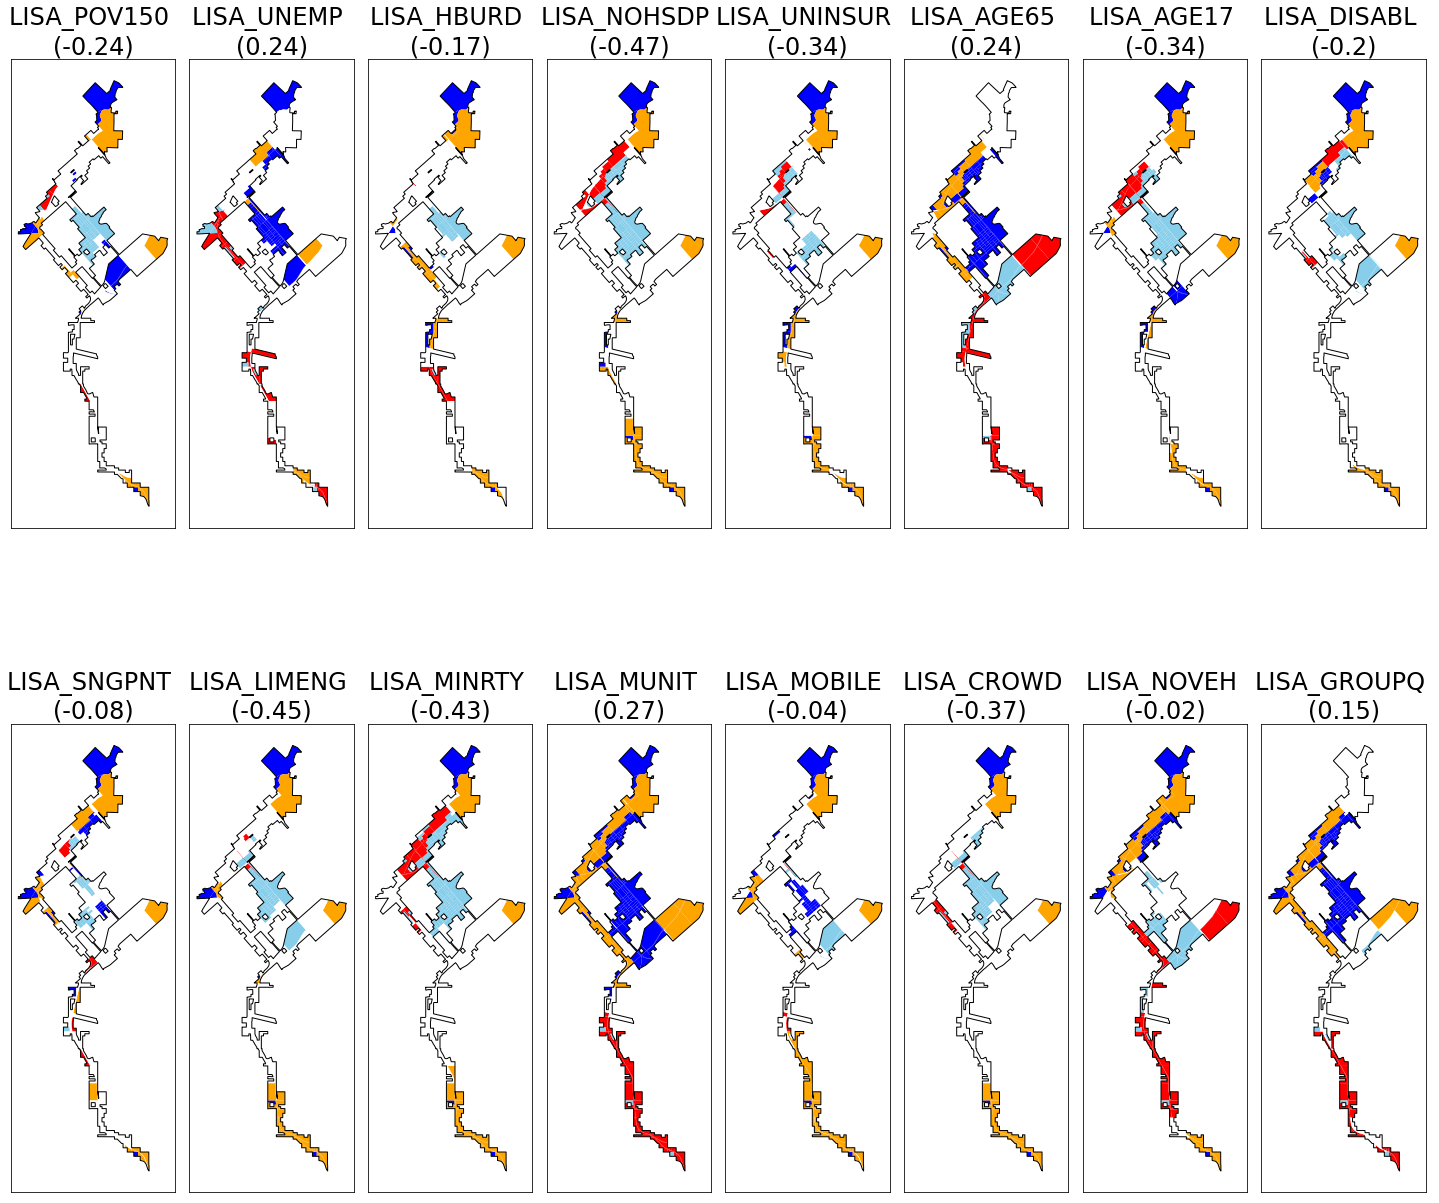

In [20]:
def plot_bivariate_moran_i_and_local_moran_i(dam_id, lm_gdf, mi_gdf):
    fig, axes = plt.subplots(2, 8, figsize=(20, 20))
    ax = axes.reshape(-1)

    # Define geography related to each dam
    dam_area = lm_gdf.loc[lm_gdf['Dam_ID'] == dam_id].reset_index()

    inund_area = dam_area.loc[dam_area['Class'] > 0]
    inund_area_union = inund_area.dissolve(by='Dam_ID')

    dam_focus = mi_gdf.loc[mi_gdf['ID'] == dam_id].reset_index()
    dam_focus = dam_focus.to_crs(epsg=5070)

    # Plot maps
    for m in range(16):
        lisa_color = {'HH': 'red', 'LL': 'blue', 'HL': 'orange', 'LH': 'skyblue', 'Not_Sig': 'white'}

        for key in lisa_color.keys():
            lm_gdf.loc[(lm_gdf[f'{plot_cols_lm[m]}'] == key) & (lm_gdf['Dam_ID'] == dam_id)].plot(ax=ax[m], color=lisa_color[key], legend=True)

        ax[m].set_title(label=f"{plot_cols_lm[m]} \n({round(dam_focus[plot_cols_mi[m]].values[0], 2)})", fontsize=24)

        inund_area_union.boundary.plot(ax=ax[m], color='black', lw=1)
        ax[m].get_xaxis().set_visible(False)
        ax[m].get_yaxis().set_visible(False)
        
    plt.tight_layout()
    plt.show()
    
# lm = gpd.read_file(os.path.join(output_path, f'{iter_num}', 'MH_F_lm.geojson'))
plot_bivariate_moran_i_and_local_moran_i(dam_id, lm, mi)